In [1]:
import csv
import pandas as pd

**1. Datensatz/Datensätze herunterladen von https://open-data.bielefeld.de/dataset/baumbestand-umweltbetrieb**

**2. Daten einlesen:**

In [2]:
#Datensatz einlesen

df = pd.read_csv("Data/einzelbaeume.csv", delimiter=";")

**3. Daten anschauen und die Zeilen verstehen:**

In [3]:
df.head()

,WKT,oid,baumart_de,baumart_bo,kronendurc,pfle_art_n,pfle_art_b,baumhoehe_,standort_n_output,kronendurc_output
0,POINT (469633.383117676 5752972.41107178),990496837,Stiel-Eiche,Quercus robur,11.0,1270,Einzelbaum,20.0,1,"11,00"
1,POINT (469688.605712891 5752932.5269165),990496838,Stiel-Eiche,Quercus robur,10.0,1270,Einzelbaum,16.0,2,"10,00"
2,POINT (469712.726074219 5752922.68792725),990496839,Holländische Linde,Tilia x vulgaris,4.0,1270,Einzelbaum,13.0,3,"4,00"
3,POINT (469743.299682617 5752915.70507813),990496840,Stiel-Eiche,Quercus robur,11.0,1270,Einzelbaum,20.0,4,"11,00"
4,POINT (469902.303894043 5752879.83929443),990496841,Stiel-Eiche,Quercus robur,8.0,1270,Einzelbaum,14.0,6,"8,00"


**4. Spaltenbennenung anpassen**

In [4]:
df = df.rename(columns={
    "WKT": "Geo",
    "baumart_de": "Baumart_Deutsch",
    "baumart_bo": "Baumart_Botanisch",
    "kronendurc": "Kronendurchmesser",
    "pfle_art_n": "Pflege_Art_Nummer",
    "pfle_art_b": "Pflege_Art_Beschreibung",
    "baumhoehe_": "Baumhoehe",
    "standort_n_output": "FRAGEZEICHEN",
    "kronendurc_output": "Kronendurchmesser_gerundet"
})

In [5]:
from shapely import wkt
import geopandas as gpd

df['latlon'] = df['Geo'].apply(wkt.loads)

gdf = gpd.GeoDataFrame(df, geometry='latlon')

df['lat'] = gdf.geometry.x
df['long'] = gdf.geometry.y

In [6]:
len(df[df.Baumart_Deutsch == ""])

0

**4. Daten verstehen:**

Was bedeuten die einzelnen Zeilennamen? (ggf. Name ändern) √

Wie viele Zeilen (Bäume) haben wir überhaupt? √

Was sind mögliche Fehler in den Daten? √

In [7]:
# s. o.

In [8]:
df.shape[0]

86743

In [9]:
# - Unklare Spaltenbeschreibungen
# - Baumhöhe = 0
# - Kronendurchmesser = 0
# - Waldartiger Bestand in den Daten (Einzelbäume)
# - Pflaume,Mirabelle - Ein Baum, eine Frucht
# - leere Zeilen
# - Werte sind "NaN"
# - Geokoordinaten lassen sich nicht in Längen-/Breitengrade umwandeln

**5. Erste kleine Fragen beantworten:**

Wie hoch sind die Bäume durchschnittlich?

Wie hoch ist der höchste Baum?

Wie niedrig ist der niedrigste Baum?

Was ist die häufigste Baumart?

Was ist die seltenste Baumart?

Wie breit ist durchschnittlich die Baumkrone?

Wie breit ist die breiteste Baumkrone?

Wie klein ist die kleinste Baumkrone?

In [10]:
df['Baumhoehe'].mean()

12.980713141118015

In [11]:
df['Baumhoehe'].sum() / len(df['Baumhoehe'])

12.980713141118015

In [15]:
df.sort_values("Baumhoehe", ascending=False).head(10)

,Geo,oid,Baumart_Deutsch,Baumart_Botanisch,Kronendurchmesser,Pflege_Art_Nummer,Pflege_Art_Beschreibung,Baumhoehe,FRAGEZEICHEN,Kronendurchmesser_gerundet,latlon,lat,long
74916,POINT (474499.694519043 5765678.60791016),990526448,Gemeine Hainbuche,Carpinus betulus,7.0,1270,Einzelbaum,49.0,7,"7,00",POINT (474499.695 5765678.608),474499.694519,5.765679e+06
11704,POINT (469253.86328125 5760694.77087402),990516833,Urwelt-Mammutbaum,Metasequoia glyptostroboides,10.5,1270,Einzelbaum,39.0,1,"10,50",POINT (469253.863 5760694.771),469253.863281,5.760695e+06
81604,POINT (462997.480529785 5757489.03948975),990482869,Schwarz-Pappel,Populus nigra,13.0,1270,Einzelbaum,39.0,65,"13,00",POINT (462997.481 5757489.039),462997.480530,5.757489e+06
81603,POINT (462992.94128418 5757486.31768799),990482867,Schwarz-Pappel,Populus nigra,13.0,1270,Einzelbaum,38.0,63,"13,00",POINT (462992.941 5757486.318),462992.941284,5.757486e+06
45066,POINT (467331.222290039 5765853.84967041),990546521,Schwarz-Pappel,Populus nigra,15.0,1270,Einzelbaum,35.0,263,"15,00",POINT (467331.222 5765853.850),467331.222290,5.765854e+06
609,POINT (465626.598083496 5759459.07971191),990482062,Pyramiden-Pappel,Populus nigra 'Italica',14.0,1270,Einzelbaum,35.0,3,"14,00",POINT (465626.598 5759459.080),465626.598083,5.759459e+06
60359,POINT (463284.877075195 5760460.52709961),990485846,Hybrid-Pappel,Populus x hybrida,14.0,1270,Einzelbaum,35.0,50,"14,00",POINT (463284.877 5760460.527),463284.877075,5.760461e+06
81602,POINT (462986.087524414 5757477.10491943),990482866,Schwarz-Pappel,Populus nigra,14.0,1270,Einzelbaum,35.0,62,"14,00",POINT (462986.088 5757477.105),462986.087524,5.757477e+06
19193,POINT (467537.259887695 5763432.14807129),990510225,Kanadische-Hybrid-Pappel,Populus x canadensis,14.0,1270,Einzelbaum,35.0,4,"14,00",POINT (467537.260 5763432.148),467537.259888,5.763432e+06
4507,POINT (466431.098693848 5762743.00109863),990491864,Urwelt-Mammutbaum,Metasequoia glyptostroboides,14.0,1270,Einzelbaum,35.0,38,"14,00",POINT (466431.099 5762743.001),466431.098694,5.762743e+06


In [13]:
df[df['Baumhoehe'] > 0]['Baumhoehe'].min()

1.0

In [32]:
df["Baumart_Deutsch"].value_counts()

Stiel-Eiche                      14764
Gemeine Hainbuche                 9560
Schwarz-Erle                      6579
Winter-Linde                      4932
Feld-Ahorn                        4893
                                 ...  
Apfel `Ravensberger`                 1
Robinie "Semperflorens"              1
Japanische Großblatt-Magnolie        1
Sorte der Winter-Linde               1
Scheinbuche                          1
Name: Baumart_Deutsch, Length: 361, dtype: int64

In [51]:
df[df["Baumart_Deutsch"] == "Spießtanne"]["Baumart_Deutsch"].value_counts()

Spießtanne    1
Name: Baumart_Deutsch, dtype: int64

In [33]:
df['Kronendurchmesser'].mean()

6.989590745074532

In [37]:
df.sort_values("Kronendurchmesser", ascending=False).head(10)

,Geo,oid,Baumart_Deutsch,Baumart_Botanisch,Kronendurchmesser,Pflege_Art_Nummer,Pflege_Art_Beschreibung,Baumhoehe,FRAGEZEICHEN,Kronendurchmesser_gerundet,latlon,lat,long
11073,POINT (470556.256896973 5760933.71832275),990520884,Amerikanische Roteiche,Quercus rubra,25.0,1276,Einzelbaum aAGP/VSP,25.0,6,"25,00",POINT (470556.257 5760933.718),470556.256897,5.760934e+06
31307,POINT (468334.121887207 5768535.69372559),990555141,Hybrid-Pappel,Populus x hybrida,25.0,1276,Einzelbaum aAGP/VSP,31.0,39,"25,00",POINT (468334.122 5768535.694),468334.121887,5.768536e+06
27385,POINT (471251.383483887 5754733.46948242),990508294,Stiel-Eiche,Quercus robur,25.0,1270,Einzelbaum,23.0,270,"25,00",POINT (471251.383 5754733.469),471251.383484,5.754733e+06
73278,POINT (461480.375305176 5757687.8059082),990491696,Stiel-Eiche,Quercus robur,25.0,1276,Einzelbaum aAGP/VSP,21.0,31,"25,00",POINT (461480.375 5757687.806),461480.375305,5.757688e+06
34569,POINT (464659.846313477 5770455.05047607),990566778,Stiel-Eiche,Quercus robur,24.0,1276,Einzelbaum aAGP/VSP,22.0,181,"24,00",POINT (464659.846 5770455.050),464659.846313,5.770455e+06
83725,POINT (463471.063903809 5755842.07507324),990491134,Stiel-Eiche,Quercus robur,24.0,1276,Einzelbaum aAGP/VSP,20.0,4,"24,00",POINT (463471.064 5755842.075),463471.063904,5.755842e+06
31309,POINT (468339.783325195 5768538.50048828),990555143,Silber-Weide,Salix alba,23.0,1276,Einzelbaum aAGP/VSP,7.0,41,"23,00",POINT (468339.783 5768538.500),468339.783325,5.768539e+06
63820,POINT (468149.364318848 5768086.77111816),990552946,Stiel-Eiche,Quercus robur,23.0,1276,Einzelbaum aAGP/VSP,27.0,36,"23,00",POINT (468149.364 5768086.771),468149.364319,5.768087e+06
17483,POINT (467411.865905762 5762920.67651367),990514822,Blutbuche,Fagus sylvatica 'Purpurea',22.0,1270,Einzelbaum,26.0,315,"22,00",POINT (467411.866 5762920.677),467411.865906,5.762921e+06
74499,POINT (472840.899719238 5765983.29431152),990524227,Stiel-Eiche,Quercus robur,22.0,1270,Einzelbaum,24.0,26,"22,00",POINT (472840.900 5765983.294),472840.899719,5.765983e+06


In [41]:
df[df['Kronendurchmesser'] > 0]['Kronendurchmesser'].min()

0.5

**6. Weiterführende Fragen:**

Welche Baumart ist im Schnitt am höchsten? Welche am niedrigsten?

Hängen Baumhöhe und Kronenbreite zusammen, also ist die Krone breiter, wenn der Baum höher ist?

In [46]:
df.groupby("Baumart_Deutsch").mean().sort_values("Baumhoehe", ascending=False)

,oid,Kronendurchmesser,Pflege_Art_Nummer,Baumhoehe,FRAGEZEICHEN,lat,long
Baumart_Deutsch,,,,,,,
Siskiyou-Fichte,9.904920e+08,12.000000,1270.00,25.000000,536.000000,466430.743713,5.762748e+06
Großfrüchtige Douglasie,9.904812e+08,9.000000,1270.00,25.000000,1.000000,466105.704895,5.760442e+06
Kanadische-Hybrid-Pappel,9.905251e+08,11.306452,1270.00,24.193548,105.516129,469692.009773,5.764190e+06
Edel-Tanne,9.904920e+08,14.000000,1270.00,23.500000,333.000000,466394.679810,5.762839e+06
Spießtanne,9.904921e+08,8.000000,1270.00,23.000000,768.000000,466301.568909,5.762749e+06
...,...,...,...,...,...,...,...
Hänge-Ulme,9.905423e+08,2.250000,1270.75,2.000000,65.500000,467518.390152,5.763401e+06
Kugelsumpfeiche,9.905674e+08,1.000000,1271.00,2.000000,33.000000,467328.244080,5.764066e+06
Säulenblutbuche 'Dawyck Purple',9.905025e+08,1.000000,1271.00,2.000000,102.000000,468747.755676,5.756574e+06


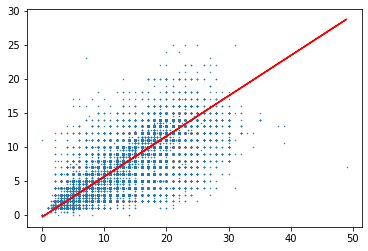

-0.0021018061651796663 0.5925719895694251 -0.28606586845013326


In [89]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Baumhoehe'], df['Kronendurchmesser'], s=0.25, marker="o", )

m, n, b = np.polyfit(df['Baumhoehe'], df['Kronendurchmesser'], 2)
plt.plot(df['Baumhoehe'], m*m*df['Baumhoehe']+n*df['Baumhoehe']+b, "-r")

#df.plot(x="Baumhoehe", y="Kronendurchmesser", kind="scatter", s=0.25, c="green")

plt.show()

print(m,n,b)